<a href="https://colab.research.google.com/github/zhenghaojiang/DSGE/blob/main/LogLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sympy import *
import numpy as np

## Linear
Guess policy function: \\
$(I_{t}-I)=A(k_{t}-k)+B(z_{t}-1)$ \\
\
$A$ and $B$ satisfy: \\
$\frac{1+r}{100}(\frac{A}{k}-\frac{I}{k^2})=(1-\delta+A)(M_{1}+M_{2}A)$ \\
$\frac{(1+r)B}{100k}=\theta k^{\theta-1}\rho +M_{1}B+M_{2}B(A+\rho)$ \\
\
where \\
$M_{1}=\theta(\theta-1)k^{\theta-2}-0.01\frac{I^2}{k^3}-0.01(1-\delta)\frac{I}{k^2}$ \\
$M_{2}=0.01(\frac{I}{k^2}+\frac{1-\delta}{k})$




In [16]:
r = 1/0.96 - 1
theta = 0.70
delta = 0.15
rho = 0.70
k_st = (((r+delta)*(1+0.01*delta)-0.005*(delta**2))/theta) ** (1/(theta-1))
I_st = delta*k_st
m1 = theta*(theta-1)*(k_st**(theta-2))-0.01*(I_st**2)/(k_st**3)-0.01*(1-delta)*I_st/(k_st**2)
m2 = 0.01*(I_st/(k_st**2)+(1-delta)/k_st)

A = Symbol('A')
B = Symbol('B')
solved_value = solve([0.01*(1+r)*(A/k_st-I_st/(k_st**2))-(1-delta+A)*(m1+m2*A), 
            0.01*(1+r)*B/k_st-theta*(k_st**(theta-1))*rho-m1*B-m2*B*(A+rho)], 
            [A, B])
#print(solved_value)

In [17]:
kab = np.array(solved_value)[0]
sigma = 0.15
z0 = 1
k0 = 1
def action(k, z):
  I_tilt = kab[0]*(k-k_st)+kab[1]*(z-1)
  return I_tilt+I_st

I0 = action(k0,z0)
def ztrans(z=z0):
  lnz = np.log(z)
  lnz_new = rho*lnz + np.random.normal(0, sigma, 1)[0]
  return np.exp(lnz_new)
def ktrans(k=k0, I=I0):
  k_new = (1-delta)*k+I
  return k_new
k_sim = []
I_sim = []
z_sim = []
for i in range(500):
  if i==0:
    z_sim.append(z0)
    k_sim.append(k0)
    I_sim.append(I0)
  else:
    z_sim.append(ztrans(z_sim[i-1]))
    k_sim.append(ktrans(k_sim[i-1],I_sim[i-1]))
    I_sim.append(action(k_sim[i],z_sim[i]))

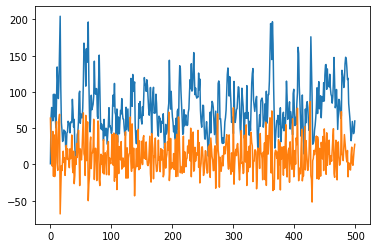

In [18]:
import matplotlib.pyplot as plt
plt.plot(k_sim)
plt.plot(I_sim)

## LogLinear
Guess policy function: \\
$\hat{I_{t}}=A\hat{k_{t}}+B\hat{z_{t}}$ \\
\
$A$ and $B$ satisfy: \\
$0.01(1+r)\frac{I}{k}(A-1)=(1-\delta+A\frac{I}{k})(M_{1}+M_{2}A)$ \\
$0.01(1+r)\frac{I}{k}B=\theta k^{\theta-1}\rho+M_{1}B\frac{I}{k}+M_{2}(AB\frac{I}{k}+\rho)$ \\
\
where \\
$M_{1}=\theta(\theta-1)k^{\theta-1}-0.01(\frac{I}{k})^2-0.01(1-\delta)\frac{I}{k}$ \\
$M_{2}=0.01(\frac{I}{k})^2+0.01(1-\delta)\frac{I}{k}$

In [19]:
r = 1/0.96 - 1
theta = 0.70
delta = 0.15
rho = 0.70
k = (((r+delta)*(1+0.01*delta)-0.005*(delta**2))/theta) ** (1/(theta-1))
I = delta*k
m1 = theta*(theta-1)*(k**(theta-1))-0.01*((I/k)**2)-0.01*(1-delta)*I/k
m2 = 0.01*((I/k)**2)+0.01*(1-delta)*I/k

A = Symbol('A')
B = Symbol('B')
solved_value = solve([0.01*(1+r)*I*(A-1)/k-(1-delta+A*I/k)*(m1+m2*A), 
            0.01*(1+r)*I*B/k-theta*(k**(theta-1))*rho-m1*B*I/k-m2*(A*B*I/k+rho)], 
            [A, B])
print(solved_value)


[(-4.76019313539306, 11.7774117434843), (45.4063042465042, 663.568638967629)]


In [20]:
kab = np.array(solved_value)[0]
sigma = 0.15
z0 = 1
k0 = 1
def action(k, z):
  k_hat = np.log(k/k_st)
  z_hat = np.log(z)
  I_hat = np.float64(kab[0]*k_hat+kab[1]*z_hat)
  return I_st*np.exp(I_hat)
I0 = action(k0,z0)
def ztrans(z=z0):
  lnz = np.log(z)
  lnz_new = rho*lnz + np.random.normal(0, sigma, 1)[0]
  return np.exp(lnz_new)
def ktrans(k=k0, I=I0):
  k_new = (1-delta)*k+I
  return k_new
k_sim = []
I_sim = []
z_sim = []
for i in range(500):
  if i==0:
    z_sim.append(z0)
    k_sim.append(k0)
    I_sim.append(I0)
  else:
    z_sim.append(ztrans(z_sim[i-1]))
    k_sim.append(ktrans(k_sim[i-1],I_sim[i-1]))
    I_sim.append(action(k_sim[i],z_sim[i]))

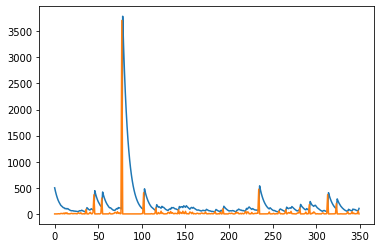

In [21]:
import matplotlib.pyplot as plt
plt.plot(k_sim[150:])
plt.plot(I_sim[150:])